# Examining the results from new model

In [9]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [11]:
# Import the results
results = pd.read_csv('results_test.csv')
results = results.rename(columns={
    "Precipitation (kg/m^2/s)": "Precip",
    "Temperature (K)": "Temp",
    "Predictions": "Pred"
})

# Convert the date from ordinal to datetime
results['Date'] = results['Date'].apply(lambda x: datetime.datetime.fromordinal(x))

# Set index to date
results = results.set_index('Date')

results.head()

,Lat,Alt,Precip,Temp,Pred,Actual
Date,,,,,,
2003-12-02,47.98,190.0,0.0,271.142517,-13.439503,-16.59
2003-12-02,49.38,245.0,0.0,265.255096,-21.274702,-20.07
2003-12-02,46.29,45.0,0.0,270.236603,-18.899832,-8.42
2003-12-02,45.32,114.0,0.0,269.147888,-21.065117,-13.85
2003-12-02,48.78,178.0,0.0,252.437027,-11.542712,-12.78


## Examining Precipitation

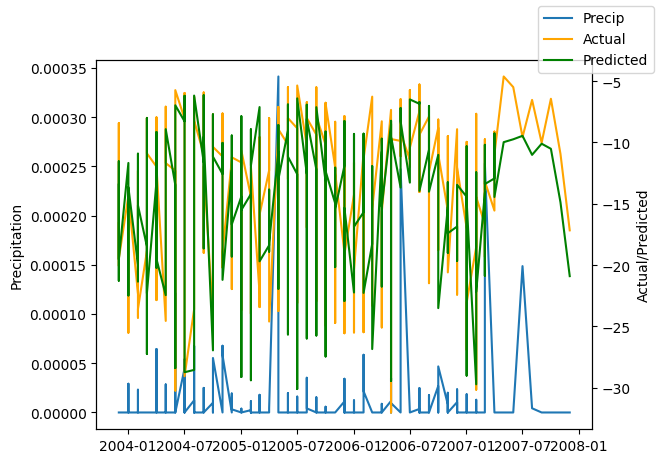

In [13]:
# Plot precip and then on separate axis plot actual and pred
fig, ax1 = plt.subplots()

ax1.plot(results['Precip'], label='Precip')
ax1.set_ylabel('Precipitation')

ax2 = ax1.twinx()
ax2.plot(results['Actual'], label='Actual', color='orange')
ax2.plot(results['Pred'], label='Predicted', color='green')
ax2.set_ylabel('Actual/Predicted')

fig.legend()
plt.show()

